In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers, models
from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/datasets/digit-recognizer/train.csv')

In [ ]:
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


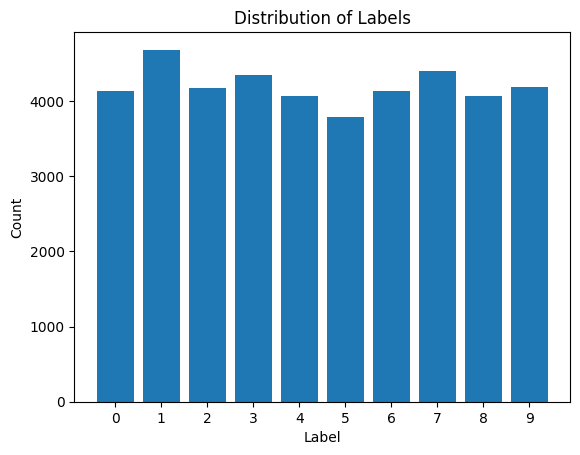

In [ ]:


# Get the label counts from the DataFrame
label_counts = train_df['label'].value_counts()

# Create a bar chart
plt.bar(label_counts.index, label_counts.values)

# Set labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')

# Set x-axis ticks
plt.xticks(list(label_counts.index))

# Show the plot
plt.show()

In [ ]:
def image_row_reshaper(df, row_number, visualize=False, test_df = False):
    '''
        Parameters:
            df --> Pandas dataframe type
            row_number --> row index (For example: 0, 1, 2, 3, etc.)
            visualize --> If True then displays the raw data into 28 by 28 pixels image.
                          If False then returns '28 by 28 pixels reshaped image data' and 'corresponding label'
    '''
    raw_image_data = df.loc[row_number,] #Taking user given image from the dataframe
    
    if test_df == False:
        image_label = raw_image_data[0] #This is the label of the current particular image
        filtered_image_data = raw_image_data[1:] #taking data after the first value as the first value is label
    else:
        filtered_image_data = raw_image_data
        
    reshaped_image_data = filtered_image_data.values.reshape((28,28)) #Reshaping the image into 28 by 28 pixes
    
    if visualize==True:
        plt.imshow(reshaped_image_data, cmap='gray')
        if test_df == False:
            plt.title(f'Label: {image_label}')
        plt.show()
    else:
        return reshaped_image_data, image_label

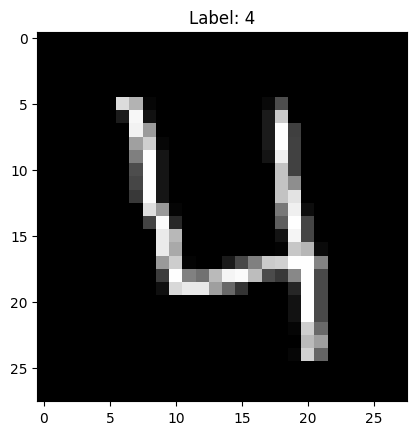

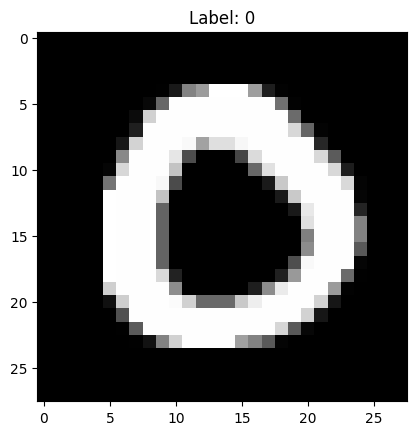

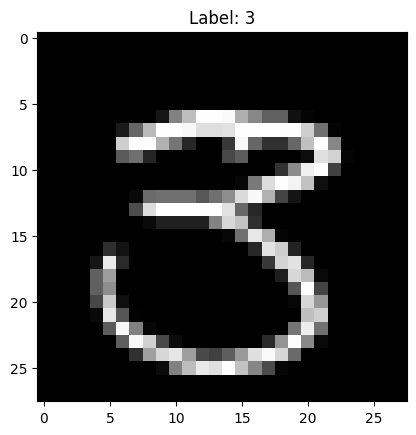

In [ ]:
image_row_reshaper(train_df, 3, visualize=True)
image_row_reshaper(train_df, 4, visualize=True)
image_row_reshaper(train_df, 7, visualize=True)

In [ ]:
train_df.shape

(42000, 785)

In [ ]:
def dataframe_formatter(df, isTest=False):
    
    if isTest==False:
        y = df['label'] # extracting just the labels into a scalar form
        X = train_df.loc[:,'pixel0':'pixel783'] # extracting just the pixels data
        X = X.apply(lambda x: x/255) # normalizing the values between 0 and 1
        X = X.values.reshape(-1, 28, 28, 1)
        return X, y
        
    elif isTest==True:
        X = df
        X = X.apply(lambda x: x/255) # normalizing the values between 0 and 1
        X = X.values.reshape(-1, 28, 28, 1)
        return X

In [ ]:
X_train, y_train = dataframe_formatter(train_df, isTest=False)

In [ ]:
# Split the data into a train and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=13)

In [ ]:
model = models.Sequential(
    [
        layers.Conv2D(20, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (2, 2), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(units=200, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(units=10, activation='sigmoid')
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 20)        200       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        5792      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          4128      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 32)         0

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
stop_training = EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
model.fit(
    X_train,
    y_train,
    epochs=20,
    validation_data=(X_val, y_val),
    callbacks=stop_training
)

Epoch 1/20
1050/1050 [==============================] - 44s 38ms/step - loss: 0.2899 - accuracy: 0.9103 - val_loss: 0.1057 - val_accuracy: 0.9680
Epoch 2/20
1050/1050 [==============================] - 35s 33ms/step - loss: 0.0866 - accuracy: 0.9729 - val_loss: 0.0698 - val_accuracy: 0.9777
Epoch 3/20
1050/1050 [==============================] - 31s 30ms/step - loss: 0.0611 - accuracy: 0.9797 - val_loss: 0.0784 - val_accuracy: 0.9765
Epoch 4/20
1050/1050 [==============================] - 30s 28ms/step - loss: 0.0519 - accuracy: 0.9833 - val_loss: 0.0880 - val_accuracy: 0.9725
Epoch 5/20
1050/1050 [==============================] - 34s 32ms/step - loss: 0.0395 - accuracy: 0.9879 - val_loss: 0.0502 - val_accuracy: 0.9844
Epoch 6/20
1050/1050 [==============================] - 31s 30ms/step - loss: 0.0357 - accuracy: 0.9883 - val_loss: 0.0547 - val_accuracy: 0.9854
Epoch 7/20
1050/1050 [==============================] - 29s 28ms/step - loss: 0.0313 - accuracy: 0.9896 - val_loss: 0.0530 -

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/datasets/digit-recognizer/test.csv')

In [ ]:
test_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_df.shape

(28000, 784)

In [ ]:
X_test = dataframe_formatter(test_df, isTest=True)

In [ ]:
X_test.shape

(28000, 28, 28, 1)

In [ ]:
predictions = model.predict(X_test, verbose=0)

In [ ]:
predicted_labels = np.argmax(predictions, axis=-1)

In [ ]:
def test_model(row):
    image_row_reshaper(test_df, row, visualize=True, test_df = True)
    print(f'Predicted Label: {predicted_labels[row]}')

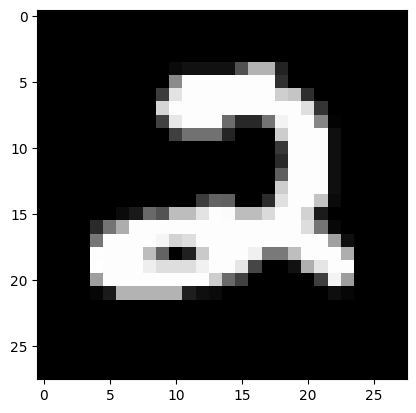

Predicted Label: 2


In [ ]:
test_model(0)